GRADED CHALLANGE 1

Muhammad Galang Al-Hakim

HCK-004

IMPORT LIBRARY

In [49]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

#Model
from sklearn.linear_model import LinearRegression

#Evaluasi
from sklearn.metrics import mean_absolute_error, mean_squared_error

#Save model
import pickle

DATA LOADING

In [5]:
df = pd.read_csv(r'C:\Users\Galang\Desktop\H8\GC\GC PHASE 1\GC 1\rideshare_kaggle.csv')
df

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [6]:
pd.set_option('display.max_columns', None)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

EXPLORATIONARY DATA ANALYSIS (EDA)

In [8]:
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,35.881222,0.008922,0.146076,0.741119,6.186253,8.469860,1.544049e+09,8.467970,45.040982,1.544050e+09,34.150736,1.544102e+09,41.614054,1.544050e+09,30.139824,1.544099e+09,31.656256,1010.094766,220.055853,0.686502,0.248908,8.467970,313.513635,1.544027e+09,1.544060e+09,0.579066,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,7.918707,0.026901,0.328938,0.138595,3.148223,5.289179,6.928244e+05,2.602888,5.996541,6.937921e+05,6.383163,6.922923e+05,7.666138,6.941699e+05,8.057468,6.927378e+05,9.142355,13.472899,99.102736,0.358534,0.474097,2.602888,27.953061,6.911393e+05,6.906634e+05,0.244705,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,12.130000,0.000000,0.000000,0.380000,0.450000,0.800000,1.543151e+09,0.717000,32.680000,1.543154e+09,17.850000,1.543234e+09,22.620000,1.543187e+09,11.810000,1.543234e+09,4.390000,988.090000,2.000000,0.000000,0.000000,0.717000,269.400000,1.543147e+09,1.543181e+09,0.090000,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,31.910000,0.000000,0.000000,0.640000,3.410000,4.060000,1.543432e+09,8.432000,42.570000,1.543439e+09,30.170000,1.543489e+09,36.570000,1.543439e+09,27.700000,1.543478e+09,27.490000,999.820000,124.000000,0.370000,0.000000,8.432000,290.900000,1.543406e+09,1.543440e+09,0.300000,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,35.900000,0.000000,0.000000,0.710000,5.910000,7.550000,1.543756e+09,9.880000,44.680000,1.543788e+09,34.180000,1.543817e+09,40.950000,1.543788e+09,30.030000,1.543817e+09,30.690000,1009.250000,258.000000,0.820000,0.000000,9.880000,307.400000,1.543752e+09,1.543785e+09,0.680000,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,40.080000,0.000000,0.000000,0.880000,8.410000,11.740000,1.544846e+09,9.996000,46.910000,1.544814e+09,38.730000,1.544836e+09,44.120000,1.544818e+09

In [9]:
df.head(3)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000


In [10]:
df.tail()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.0,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,9.5,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,27.0,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693070,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,10.0,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [11]:
# Check Missing Values

df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [12]:
# Check Missing Values as Percentage to Total Data

df.isnull().mean()

id                             0.000000
timestamp                      0.000000
hour                           0.000000
day                            0.000000
month                          0.000000
datetime                       0.000000
timezone                       0.000000
source                         0.000000
destination                    0.000000
cab_type                       0.000000
product_id                     0.000000
name                           0.000000
price                          0.079494
distance                       0.000000
surge_multiplier               0.000000
latitude                       0.000000
longitude                      0.000000
temperature                    0.000000
apparentTemperature            0.000000
short_summary                  0.000000
long_summary                   0.000000
precipIntensity                0.000000
precipProbability              0.000000
humidity                       0.000000
windSpeed                      0.000000


In [13]:
df.dropna(axis=0, inplace=True)

In [14]:
df.duplicated().sum()

0

Check Correlation

C:\Users\Galang\AppData\Local\Temp\ipykernel_21968\3493600305.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


<Axes: >

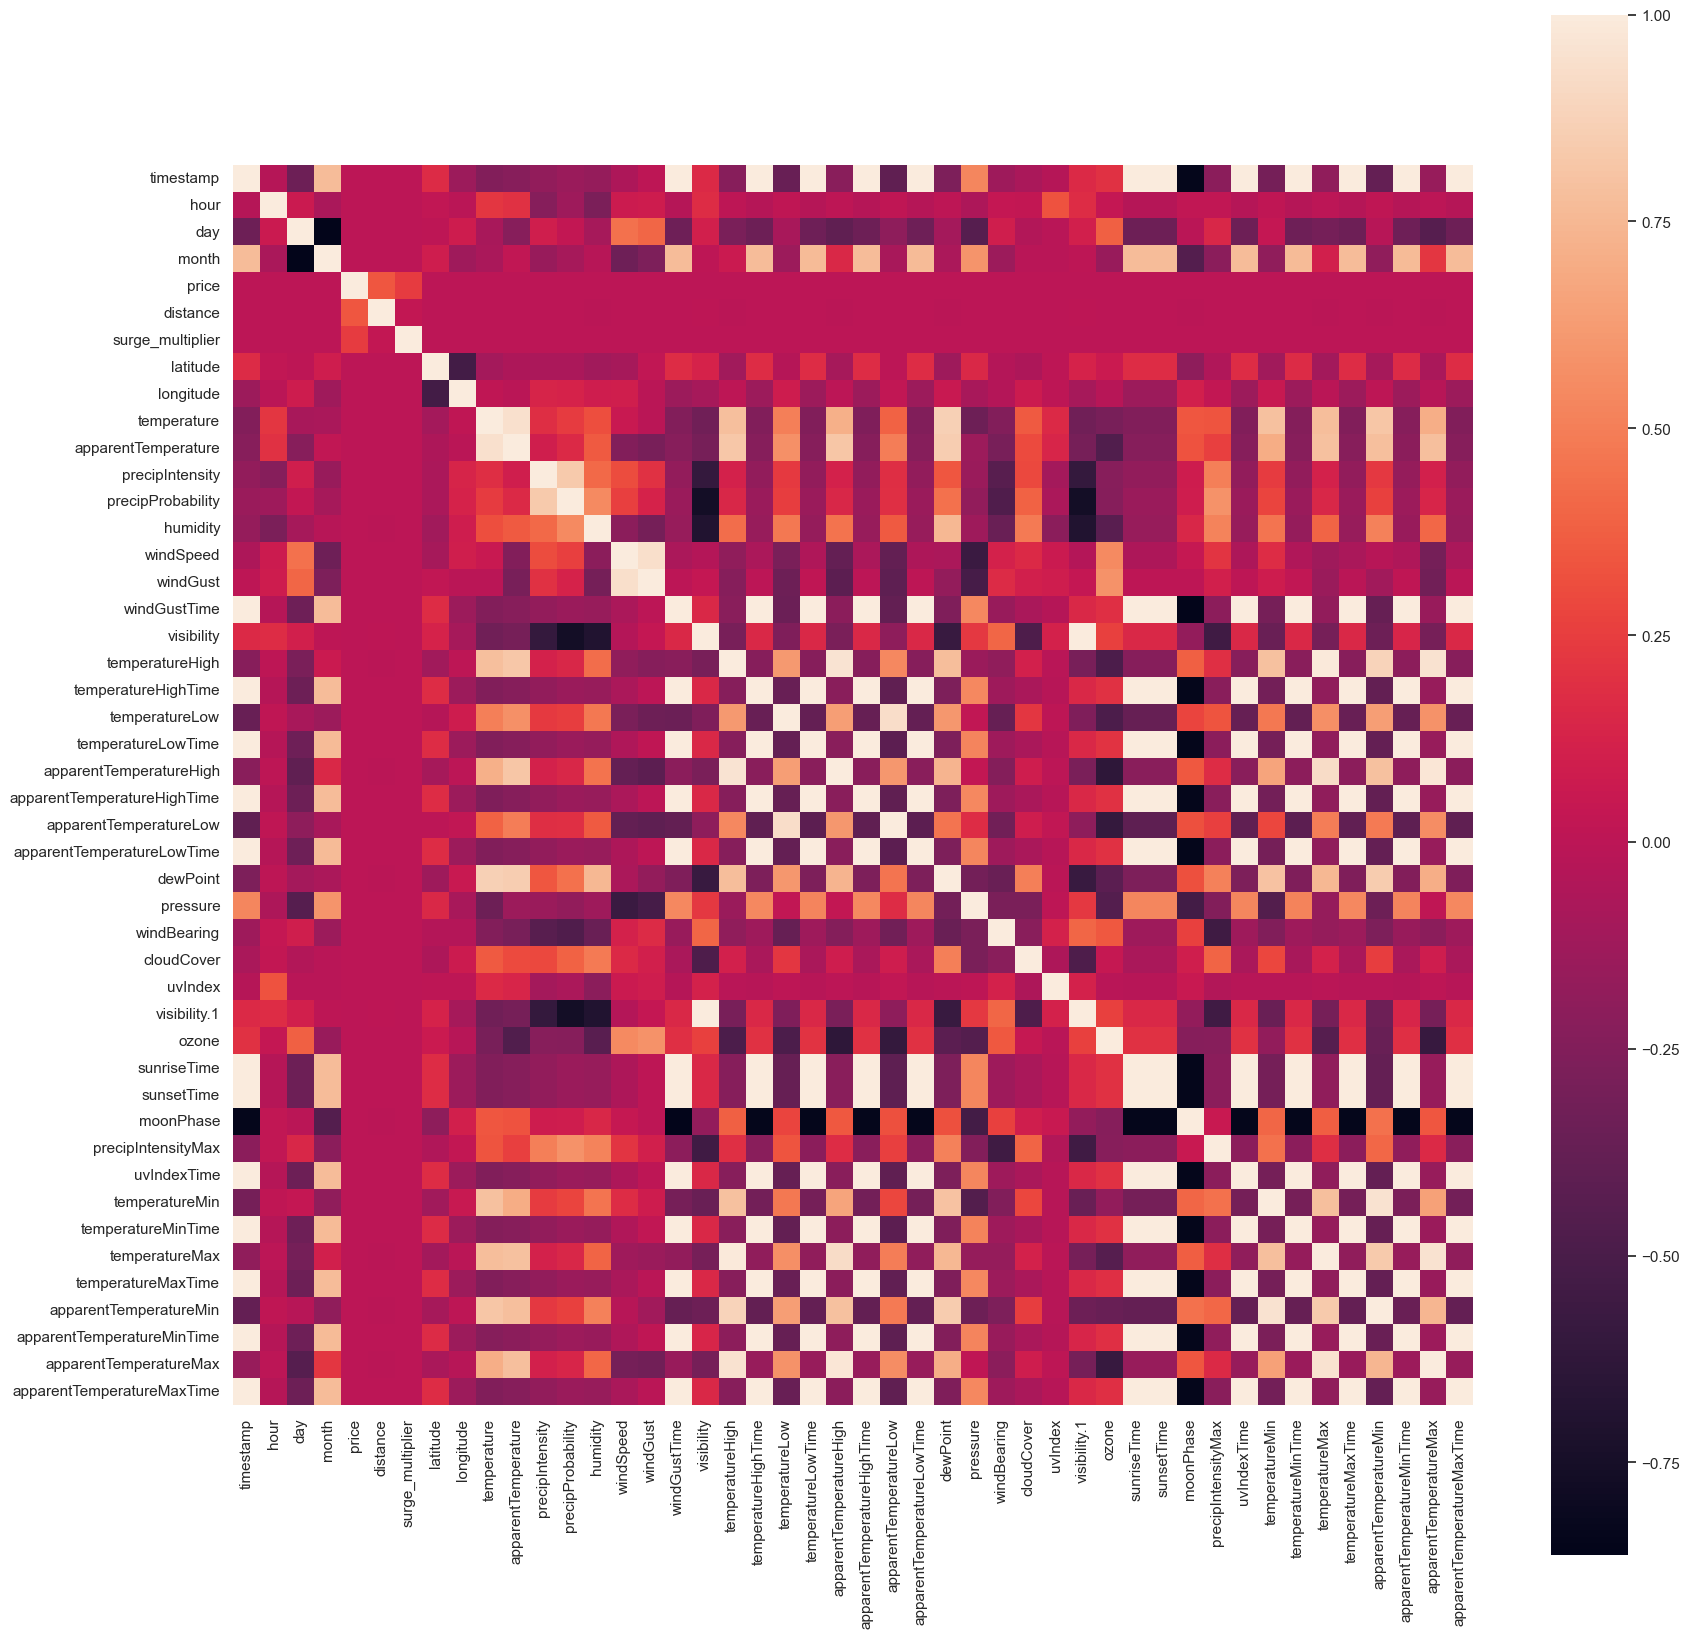

In [15]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, square=True)

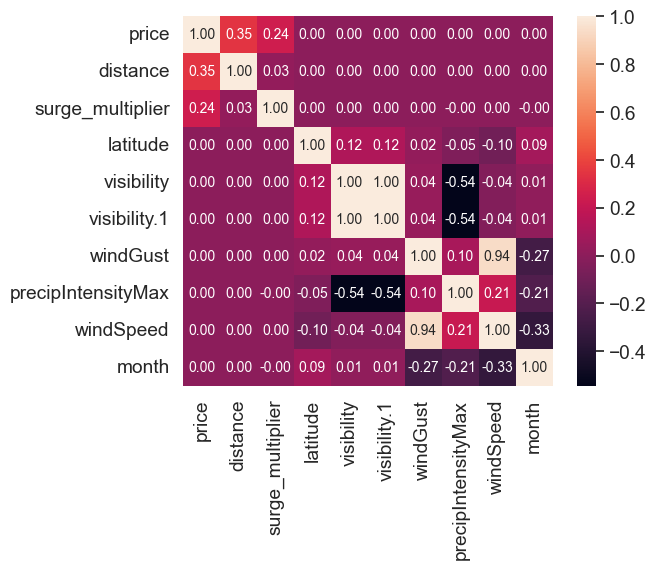

In [16]:
#price correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [17]:
columns = ['price', 'distance', 'surge_multiplier', 'short_summary', 'long_summary', 'name', 'cab_type']
analyze_df = df[columns]

In [18]:
analyze_df

,price,distance,surge_multiplier,short_summary,long_summary,name,cab_type
0,5.0,0.44,1.0,Mostly Cloudy,Rain throughout the day.,Shared,Lyft
1,11.0,0.44,1.0,Rain,"Rain until morning, starting again in the eve...",Lux,Lyft
2,7.0,0.44,1.0,Clear,Light rain in the morning.,Lyft,Lyft
3,26.0,0.44,1.0,Clear,Partly cloudy throughout the day.,Lux Black XL,Lyft
4,9.0,0.44,1.0,Partly Cloudy,Mostly cloudy throughout the day.,Lyft XL,Lyft
...,...,...,...,...,...,...,...
693065,9.5,1.00,1.0,Partly Cloudy,Light rain in the morning and overnight.,WAV,Uber
693066,13.0,1.00,1.0,Partly Cloudy,Light rain in the morning and overnight.,UberXL,Uber
693067,9.5,1.00,1.0,Partly Cloudy,Light rain in the morning and overnight.,UberX,Uber
693069,27.0,1.00,1.0,Partly Cloudy,Light rain in the morning and overnight.,Black SUV,Uber


In [19]:
analyze_df.isnull().sum()

price               0
distance            0
surge_multiplier    0
short_summary       0
long_summary        0
name                0
cab_type            0
dtype: int64

In [20]:
analyze_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   price             637976 non-null  float64
 1   distance          637976 non-null  float64
 2   surge_multiplier  637976 non-null  float64
 3   short_summary     637976 non-null  object 
 4   long_summary      637976 non-null  object 
 5   name              637976 non-null  object 
 6   cab_type          637976 non-null  object 
dtypes: float64(3), object(4)
memory usage: 38.9+ MB


In [21]:
analyze_df.describe()

,price,distance,surge_multiplier
count,637976.000000,637976.000000,637976.000000
mean,16.545125,2.189261,1.015068
std,9.324359,1.135413,0.095422
min,2.500000,0.020000,1.000000
25%,9.000000,1.270000,1.000000
50%,13.500000,2.160000,1.000000
75%,22.500000,2.930000,1.000000
max,97.500000,7.860000,3.000000


In [22]:
analyze_df.head()

,price,distance,surge_multiplier,short_summary,long_summary,name,cab_type
0,5.0,0.44,1.0,Mostly Cloudy,Rain throughout the day.,Shared,Lyft
1,11.0,0.44,1.0,Rain,"Rain until morning, starting again in the eve...",Lux,Lyft
2,7.0,0.44,1.0,Clear,Light rain in the morning.,Lyft,Lyft
3,26.0,0.44,1.0,Clear,Partly cloudy throughout the day.,Lux Black XL,Lyft
4,9.0,0.44,1.0,Partly Cloudy,Mostly cloudy throughout the day.,Lyft XL,Lyft


In [23]:
analyze_df.tail()

,price,distance,surge_multiplier,short_summary,long_summary,name,cab_type
693065,9.5,1.0,1.0,Partly Cloudy,Light rain in the morning and overnight.,WAV,Uber
693066,13.0,1.0,1.0,Partly Cloudy,Light rain in the morning and overnight.,UberXL,Uber
693067,9.5,1.0,1.0,Partly Cloudy,Light rain in the morning and overnight.,UberX,Uber
693069,27.0,1.0,1.0,Partly Cloudy,Light rain in the morning and overnight.,Black SUV,Uber
693070,10.0,1.0,1.0,Partly Cloudy,Light rain in the morning and overnight.,UberPool,Uber


In [24]:
cat_cols= ['short_summmary', 'long_summary', 'name', 'cab_type']
num_cols= ['price', 'distance', 'surge_multiplier']

In [25]:
list(analyze_df.select_dtypes('number'))
list(analyze_df.select_dtypes(exclude='int').columns)

['price',
 'distance',
 'surge_multiplier',
 'short_summary',
 'long_summary',
 'name',
 'cab_type']

# FEATURE ENGINERING

In [26]:
x = analyze_df.drop('price', axis=1)
y = analyze_df['price']
x

,distance,surge_multiplier,short_summary,long_summary,name,cab_type
0,0.44,1.0,Mostly Cloudy,Rain throughout the day.,Shared,Lyft
1,0.44,1.0,Rain,"Rain until morning, starting again in the eve...",Lux,Lyft
2,0.44,1.0,Clear,Light rain in the morning.,Lyft,Lyft
3,0.44,1.0,Clear,Partly cloudy throughout the day.,Lux Black XL,Lyft
4,0.44,1.0,Partly Cloudy,Mostly cloudy throughout the day.,Lyft XL,Lyft
...,...,...,...,...,...,...
693065,1.00,1.0,Partly Cloudy,Light rain in the morning and overnight.,WAV,Uber
693066,1.00,1.0,Partly Cloudy,Light rain in the morning and overnight.,UberXL,Uber
693067,1.00,1.0,Partly Cloudy,Light rain in the morning and overnight.,UberX,Uber
693069,1.00,1.0,Partly Cloudy,Light rain in the morning and overnight.,Black SUV,Uber


# Data split

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = .2)

In [28]:
le = LabelEncoder()

X_train['short_summary'] = le.fit_transform(X_train['short_summary'])
X_train['long_summary'] = le.fit_transform(X_train['long_summary'])
X_train['name'] = le.fit_transform(X_train['name'])
X_train['cab_type'] = le.fit_transform(X_train['cab_type'])

In [29]:
le = LabelEncoder()

X_test['short_summary'] = le.fit_transform(X_test['short_summary'])
X_test['long_summary'] = le.fit_transform(X_test['long_summary'])
X_test['name'] = le.fit_transform(X_test['name'])
X_test['cab_type'] = le.fit_transform(X_test['cab_type'])

In [30]:
analyze_df

,price,distance,surge_multiplier,short_summary,long_summary,name,cab_type
0,5.0,0.44,1.0,Mostly Cloudy,Rain throughout the day.,Shared,Lyft
1,11.0,0.44,1.0,Rain,"Rain until morning, starting again in the eve...",Lux,Lyft
2,7.0,0.44,1.0,Clear,Light rain in the morning.,Lyft,Lyft
3,26.0,0.44,1.0,Clear,Partly cloudy throughout the day.,Lux Black XL,Lyft
4,9.0,0.44,1.0,Partly Cloudy,Mostly cloudy throughout the day.,Lyft XL,Lyft
...,...,...,...,...,...,...,...
693065,9.5,1.00,1.0,Partly Cloudy,Light rain in the morning and overnight.,WAV,Uber
693066,13.0,1.00,1.0,Partly Cloudy,Light rain in the morning and overnight.,UberXL,Uber
693067,9.5,1.00,1.0,Partly Cloudy,Light rain in the morning and overnight.,UberX,Uber
693069,27.0,1.00,1.0,Partly Cloudy,Light rain in the morning and overnight.,Black SUV,Uber


In [31]:
# perform one-hot encoding
#one_hot_data = pd.get_dummies(df['destination'])
#one_hot_data1 = pd.get_dummies(df['name'])
#one_hot_data2 = pd.get_dummies(df['cab_type'])

# Combine the one-hot encoded data with the original data
#analyze_df = pd.concat([analyze_df, one_hot_data], axis=1)
#analyze_df = pd.concat([analyze_df, one_hot_data1], axis=1)
#analyze_df = pd.concat([analyze_df, one_hot_data2], axis=1)

# Drop the original categorical variable
#analyze_df = analyze_df.drop('destination', axis=1)

# Print the resulting data
#analyze_df


In [32]:
X_train

,distance,surge_multiplier,short_summary,long_summary,name,cab_type
281008,2.67,1.0,5,4,9,1
65905,2.86,1.0,7,2,0,1
368629,2.72,1.0,6,6,3,0
38284,1.92,1.0,5,9,10,1
78016,1.14,1.0,6,6,3,0
...,...,...,...,...,...,...
284568,1.18,1.0,6,4,10,1
162609,0.75,1.0,0,6,6,0
424062,3.30,1.0,4,0,1,1
184556,2.91,1.0,5,4,7,0


In [33]:
X_test

,distance,surge_multiplier,short_summary,long_summary,name,cab_type
158189,1.40,1.0,8,2,11,1
46192,3.15,1.0,5,9,3,0
431265,3.61,1.0,5,7,8,1
311419,1.01,1.0,0,0,3,0
90606,0.62,1.0,0,6,4,0
...,...,...,...,...,...,...
172287,0.71,1.0,5,1,4,0
163312,3.58,1.0,5,4,9,1
90689,3.19,1.0,5,10,7,0
292085,2.30,1.0,5,4,7,0


HANDLING OUTLIERS

In [34]:
def diagnostic_plots(analyze_df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(analyze_df[variable], bins=20)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

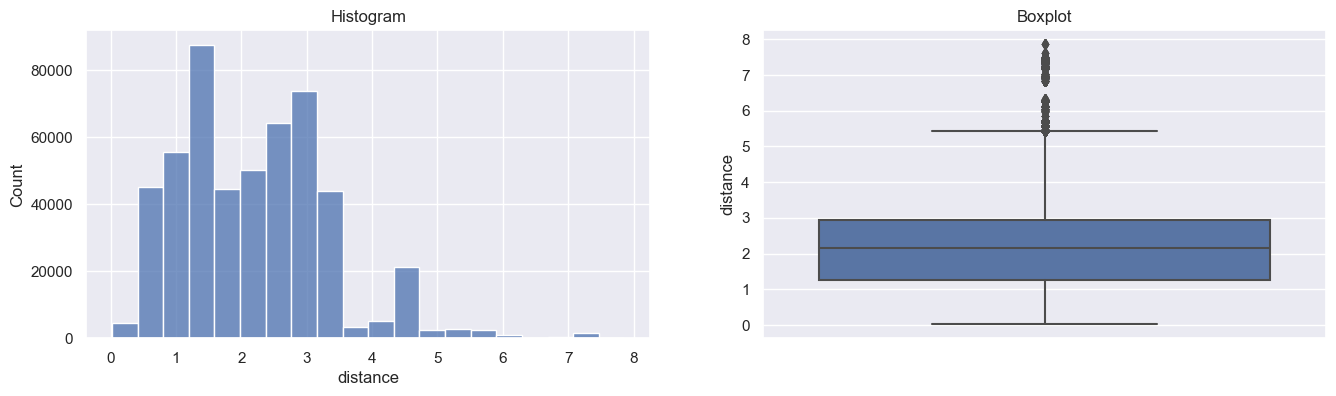


Skewness Value :  0.8177043388667687


In [36]:
diagnostic_plots(X_train, 'distance')
print('\nSkewness Value : ', X_train['distance'].skew())

In [37]:
def find_normal_boundaries(df, variable):
    upper_boundary = df[variable].mean() + 3 * df[variable].std()
    lower_boundary = df[variable].mean() - 3 * df[variable].std()

    return upper_boundary, lower_boundary

In [38]:
upper_boundary, lower_boundary = find_normal_boundaries(X_train, 'distance')
upper_boundary, lower_boundary

(5.59436908580137, -1.215981139565233)

In [39]:
outlier_right_tail=(len(X_train[X_train['distance'] > upper_boundary]) / len(X_train) * 100)
outlier_left_tail= (len(X_train[X_train['distance'] < lower_boundary]) / len(X_train) * 100)

In [40]:
print(f'% right end outliers : {outlier_right_tail}')
print(f'% left end outliers  : {outlier_left_tail}')

% right end outliers : 0.6636231827265959
% left end outliers  : 0.0


In [41]:
X_train.query('distance > @upper_boundary').index

Int64Index([553742, 462450, 353136,  72860,  87009, 531201, 273859, 624698,
            586521, 126566,
            ...
            678856, 327485, 259637, 501402, 598563, 582388,  74658, 514541,
            409710, 332723],
           dtype='int64', length=3387)

In [42]:
X_train_no_outlier = X_train[
    ~((X_train['distance'] > upper_boundary) | (X_train['distance'] < lower_boundary))]

In [43]:
X_train.shape[0] #dengan outlier

510380

In [44]:
X_train_no_outlier.shape[0] #tanpa outlier

506993

MODEL SCALING

In [53]:
s_scaler = StandardScaler()

MODEL DEFINITION

In [45]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

MODEL TRAINING

In [51]:
print('Intercept : ', lr.intercept_)
print('Slope     : ', lr.coef_)

Intercept :  -2.7129685822254466
Slope     :  [ 2.79027981e+00  2.06002210e+01  6.58179186e-03 -6.38171017e-04
 -1.62158063e+00  2.31318649e+00]


MODEL EVALUATION

In [46]:
from sklearn.metrics import r2_score

# predict using the trained model
y_pred = lr.predict(X_test)

# calculate R2 score
r2 = r2_score(y_test, y_pred)

print(f"R2 score: {r2:.3f}")

R2 score: 0.515


In [47]:
pred=lr.predict(X_train)
mean_absolute_error(y_train, pred)

5.171279828262018

In [48]:
pred=lr.predict(X_test)
mean_absolute_error(y_test, pred)

5.153726754286743

MODEL SAVING

In [56]:
pickle.dump(lr, open('file_punya_galang.pkl', 'wb'))

MODEL INFERENCE

## Jawaban Pertanyaan

### 1. Sebutkan dan jelaskan asumsi yang dipakai oleh Linear Regression !

Linear Regression adalah regresi linier yang digunakan untuk mprediksi hungan dua atau lebih variabel Untuk melakukan analisis Linear Regression, beberapa asumsi harus dipenuhi. Asumsi tersebut adalah:
- Linearitas: Hubungan antara dua variabel atau lebih yang harus memiliki hubungan yang linier.
- Independen: Observasi data harus independen satu sama lain. Sehingga tidak ada korelasi antara error.
- Homoskedastisitas:  Asumsi yang menyatakan bahwa varian setiap sisaan masih tetap sama baik untuk nilai-nilai pada variabel independen yang kecil maupun besar.
- Tidak ada Multicolinearity: kolinearitas terjadi karena terdapat korelasi yang cukup tinggi di antara variabel independen VIF (Variance Inflation Factor) merupakan salah satu cara untuk mengukur besar kolinieritas.

Jika asumsi-asumsi ini tidak terpenuhi, berkemungkinan hasil analisis Linear Regression tidak dapat digunakan dan prediksi yang dibuat dengan menggunakan model tersebut mungkin tidak akurat.

## Analisis dan Kesimpulan

Kesimpulan yang dapat diambil dari notebook diatas adalah:

1. Setelah dilakukan eksplorasi data analysis dan dilakukan modelling menggunakan Linear Regression, didapatkan nilai MAE = 5.1, dan R2 = 0.515 dengan perbedaan yang sedikit antara model train dan test. Hasil nilai tersebut menunjukkan bahwa modelling Linear Regression dapat dipakai untuk memprediksi nilai price dari data baru namun tingkat akuransinya tergolong rendah karena nilai error yang didapatkan cukup tinggi.

2. Untuk meningkatkan akurasi dari prediksi, dapaty dilakukan handling outliers padad x_train.

3. Banyaknya feature column yang berkorelasi pada kasus ini merupakan kelebihan dalam penggunaan model Linear Regression. Tetapi kelemahannya pada model adalah kurangnya tingkat akurasi model karena nilai error yang tergolong besar.